# Hands-on lattice calculations for the AUTH 2024 Accelerator Phyiscs course
*T. Prebibaj, F. Asvesta, Y. Papaphilippou*

---

# Part II: Simple beamlines and betatron oscillations

These exercises are meant to get familiar with how to construct simple beamlines and to track single particles.

---

In [9]:
# Import custom tracking functions and useful libraries
from tracking_library import *
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 5),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
plt.rcParams.update(params)

## The FODO cell

<p align="center">
<img src=./images_lectures/fodo.png width="25%">
</p>

- As shown in the lectures (lecture II slide 25), this is a FODO cell. A FODO cell is one of the most fundamental lattice topologies. In its simpler version, it consists on two thin quadrupoles of opposite focal length, f, spaced by two drifts of length L (2*L is the total length of the cell). 

- We could start the FODO from an arbitrary point inside it. The beamline that we defined in Exercise 5 was actually a FODO cell starting at the center of the focusing quadrupole (as in the lectures). Thus, that FODO cell consisted of two half-focusing quadrupoles (twice the focusing length), a defocusing quadrupole and two drifts.

### Exercise 6: tracking in a FODO cell

Define a **FODO beamline** that **starts in the middle of a drift**. 
Then, model a particle that is on the optical axis ($x=0$), but has an initial angle $x' = 1$ mrad and plot the position $x$ along the beam line.
For the moment, we can define arbitrarily the $f$ and $L$ parameters: we chose 4 m and 2 m, respectively. 

**Hint:** To better visualize the trajectory of the particle(s), always split the drifts in several shorter drifts (e.g. $10$ drifts, each $L/10$ long).

In [10]:
# build your beamline here...
# FODO has two drifts of length L. Since we start at the middle of the drift, we will have:
# a drift of L/2, then a focusing quad, then a drift of L, then a defocusing quad and finally a drift of L/2
f = 4
L = 2
FODO = 5*D(L/10)+Q(f)+10*D(L/(10))+Q(-f)+5*D(L/10)

Text(0.5, 1.0, 'Exercise 6')

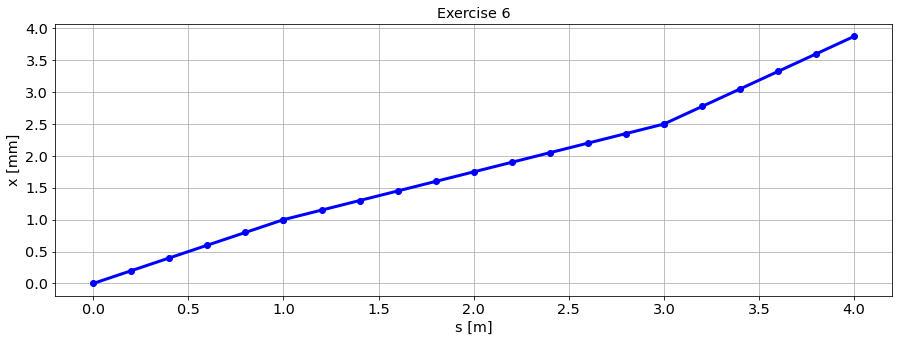

In [11]:
# track and plot the particle trajectory here...
X = np.array([[0],
              [1e-3]])

transported_particles = transportParticles(X, FODO)
plt.plot(transported_particles['s'], transported_particles['x']*1e3, 'o-b', lw=3)
plt.grid(True)
plt.xlabel('s [m]')
plt.ylabel('x [mm]')
plt.title('Exercise 6')

### Exercise 7: $x'$ of the FODO cell
Plot the angle $x'$ along the beam line.

#### SOLUTION

Text(0.5, 1.0, 'Exercise 7')

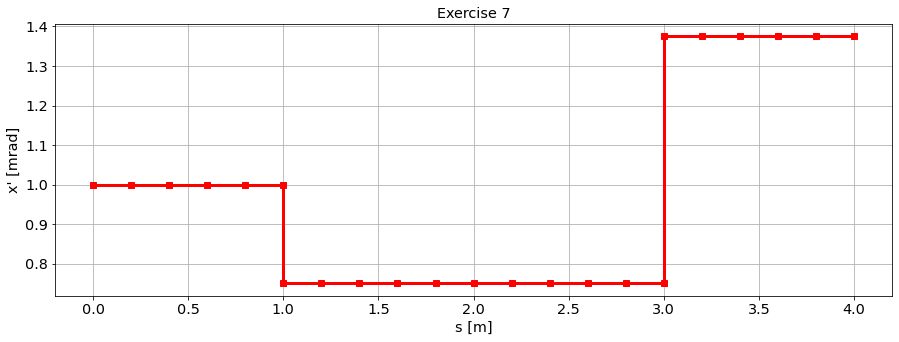

In [12]:
# code here your solution...
plt.plot(transported_particles['s'], transported_particles['xp']*1e3, 's-r', lw=3)
plt.grid(True)
plt.xlabel('s [m]')
plt.ylabel("x' [mrad]")
plt.title('Exercise 7')

### Exercise 8: multiple FODO cells

Plot both the position $x$ and the angle $x'$ through five cells. Assume $(x_0, x'_0) = (0, 1)$ (mm, mrad)

**Hint:** After having plotted $x$ trajectory on a plot, one can create a second vertical axis that shares the same horizontal axis with `plt.twinx()`

#### SOLUTION

Text(0.5, 1.0, 'Exercise 8')

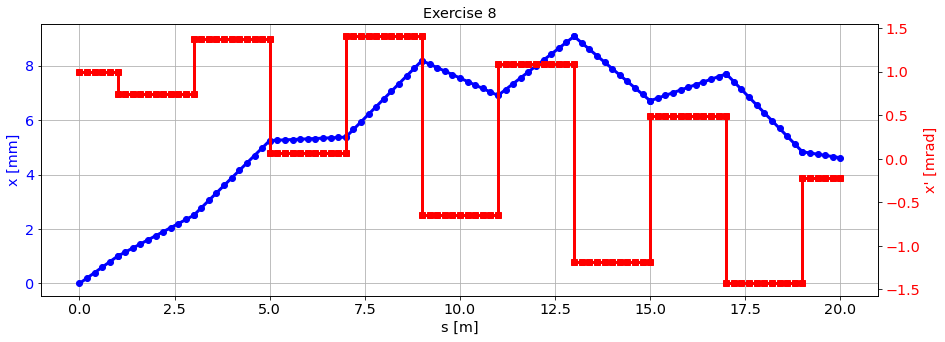

In [13]:
# code here your solution...
X = np.array([[0],
              [1e-3]])

# the transport over 5 cell can be achieved simply by multiplying the beamline description by 5
transported_particles = transportParticles(X, 5*FODO)
    
plt.plot(transported_particles['s'], transported_particles['x']*1e3, 'o-b', lw=3)
plt.grid(True)
plt.xlabel('s [m]')
plt.ylabel('x [mm]', color='b')
plt.tick_params(axis='y', labelcolor='b')

# instantiate a second axes that shares the same x-axis, and color it in red
plt.twinx()  
plt.ylabel("x' [mrad]", color='r')
plt.tick_params(axis='y', labelcolor='r')
# plot the angle as well:
plt.plot(transported_particles['s'], transported_particles['xp']*1e3, 's-r', lw=3)
plt.title('Exercise 8')

### Exercise 9: betatron oscillations

Plot the position $x$ and angle $x'$ through 100 cells.

#### SOLUTION

Text(0.5, 1.0, 'Exercise 9')

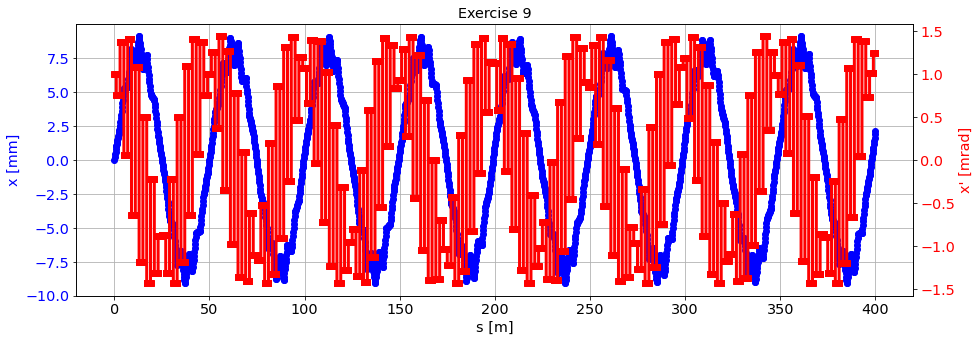

In [14]:
# code here your solution...

X = np.array([[0],
              [1e-3]])
transported_particles = transportParticles(X, 100*FODO)

plt.plot(transported_particles['s'], transported_particles['x']*1e3, 'o-b', lw=3)
plt.grid(True)
plt.xlabel('s [m]')
plt.ylabel('x [mm]', color='b')
plt.tick_params(axis='y', labelcolor='b')
ax2 = plt.twinx()
plt.ylabel("x' [mrad]", color='r')
plt.tick_params(axis='y', labelcolor='r')
plt.plot(transported_particles['s'], transported_particles['xp']*1e3, 's-r', lw=3)
plt.title('Exercise 9')

> Note: these oscillations are known as betatron oscillations

### Exercise 10: stability of the FODO lattice

Play with different values of the focal length $f$ and explore whether you can make the betatron oscillations grow.

Text(0.5, 1.0, 'Exercise 10')

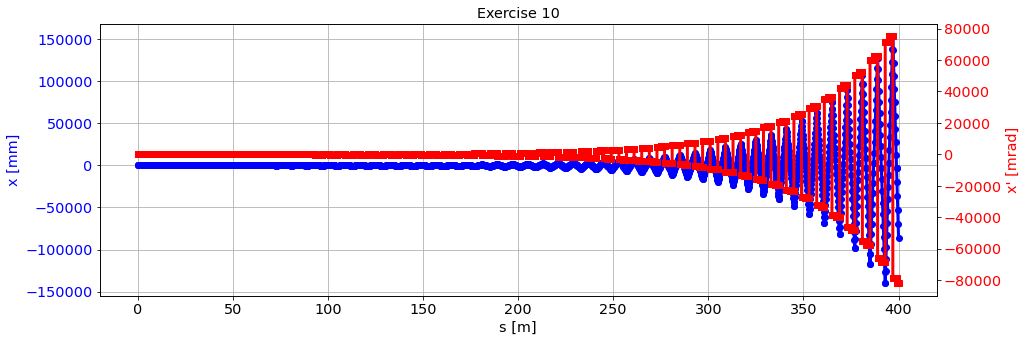

In [15]:
# code here your solution...

# very strong focusing
f = 0.999
L = 2
FODO = 5*D(L/10)+Q(f)+10*D(L/(10))+Q(-f)+5*D(L/10)

X = np.array([[0],
              [1e-3]])
transported_particles = transportParticles(X, 100*FODO)

plt.plot(transported_particles['s'], transported_particles['x']*1e3, 'o-b', lw=3)
plt.grid(True)
plt.xlabel('s [m]')
plt.ylabel('x [mm]', color='b')
plt.tick_params(axis='y', labelcolor='b')
ax2 = plt.twinx()
plt.ylabel("x' [mrad]", color='r')
plt.tick_params(axis='y', labelcolor='r')
plt.plot(transported_particles['s'], transported_particles['xp']*1e3, 's-r', lw=3)
plt.title('Exercise 10')

Text(0.5, 1.0, 'Exercise 10')

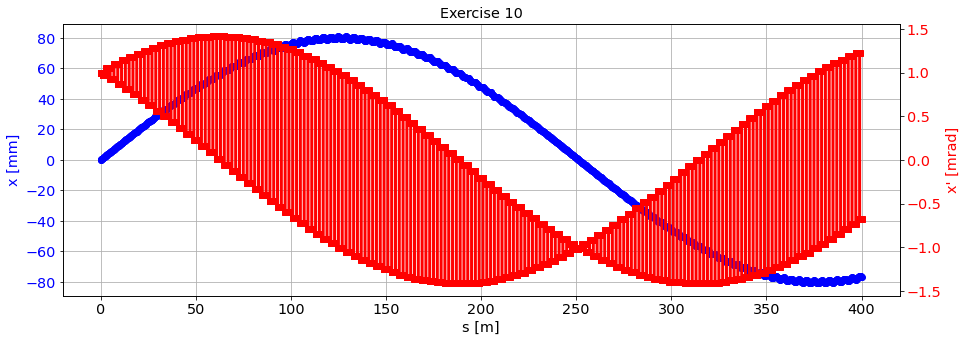

In [16]:
# code here your solution...

# very weak focusing
f = 40
L = 2
FODO = 5*D(L/10)+Q(f)+10*D(L/(10))+Q(-f)+5*D(L/10)

X = np.array([[0],
              [1e-3]])
transported_particles = transportParticles(X, 100*FODO)

plt.plot(transported_particles['s'], transported_particles['x']*1e3, 'o-b', lw=3)
plt.grid(True)
plt.xlabel('s [m]')
plt.ylabel('x [mm]', color='b')
plt.tick_params(axis='y', labelcolor='b')
ax2 = plt.twinx()
plt.ylabel("x' [mrad]", color='r')
plt.tick_params(axis='y', labelcolor='r')
plt.plot(transported_particles['s'], transported_particles['xp']*1e3, 's-r', lw=3)
plt.title('Exercise 10')

> Note: not all pairs of $(f,L)$ give a stable beamline for the particles. Remember the stability diagram of lecture II slide 73